MLT Week 5

All images: Source: IITM (will convert to Latex later on)

binary, multi-class and multi-label classification

probability of sample belonging to a specific
class by computing sigmoid

Binary classification: Sigmoid
Multi-class classification: Softmax



Model 

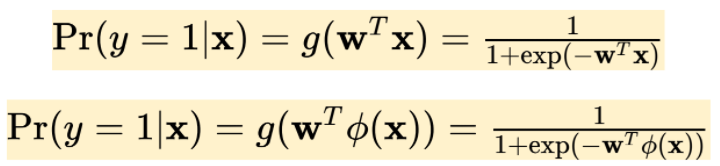

Source: IITM

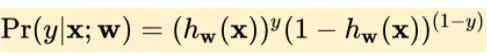

Loss

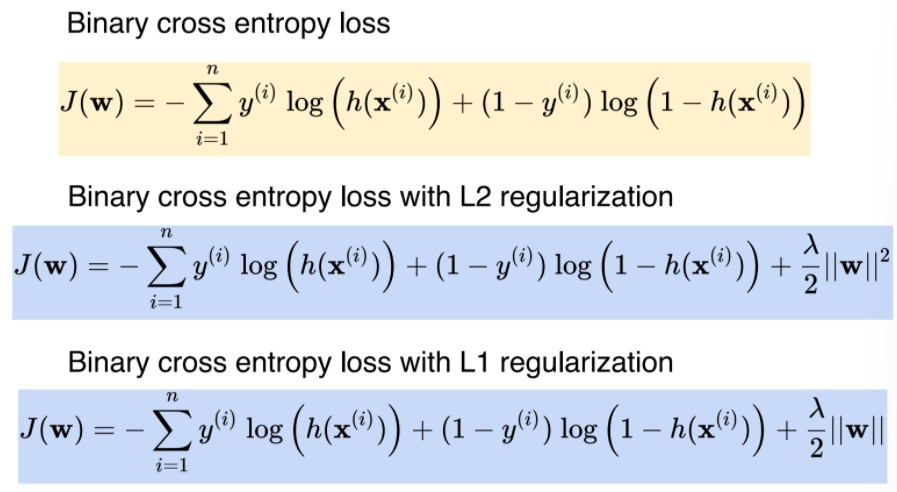

Source: IITM

Trial

$\lambda = 0$

$\text{L}_1$  


Weight update

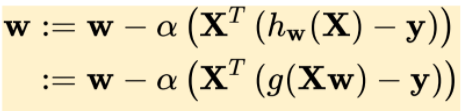

Inference

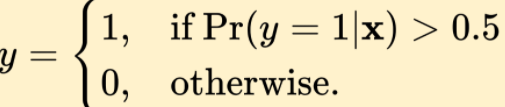

## **Logistic Regression from scratch**

Binary logistic regression

In [1]:
from IPython.display import display, Math, Latex

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
np.random.seed(1234)

In [3]:
#Model

def linear_combination(X:np.ndarray, w:np.ndarray) -> np.ndarray:
  return X@w

def sigmoid(z:np.ndarray)-> np.ndarray:
  return 1/(1+np.exp(-z))

def predict(X:np.ndarray, w:np.ndarray, threshold:float) ->np.ndarray:
  return np.where(sigmoid(linear_combination(X,w))>threshold,1,0)    #assign class 1 or 0 based on threshold


In [4]:
#Test on samples

feature_matrix = np.array([[1,20,2],[1,2,2]])
weight_vector = np.array([-1,0,1])

print("Shape of feature matrix: ",feature_matrix.shape)
print("Shape of weight_vector: ",weight_vector.shape)

class_labels = predict(feature_matrix, weight_vector, 0.5)

print("Shape of o/p: ", class_labels.shape)
print("Class label vector: ", class_labels)


Shape of feature matrix:  (2, 3)
Shape of weight_vector:  (3,)
Shape of o/p:  (2,)
Class label vector:  [1 1]


In [5]:
#Loss Function

#elasticnet reg if l1 + l2 = 1

def loss(y, sigmoid_vector, weight_vector, l1_reg_rate, l2_reg_rate):
  return (-1 *(np.sum(y*np.log(sigmoid_vector) + (1-y)* np.log(1-sigmoid_vector)))
  + l2_reg_rate * np.dot(np.transpose(weight_vector), weight_vector)
  + l1_reg_rate * np.sum(np.abs(weight_vector)))


In [6]:
#Optimization

def calculate_grad(X: np.ndarray, y:np.ndarray, w:np.ndarray, reg_rate:float) -> np.ndarray:
  return np.transpose(X)@(sigmoid(linear_combination(X,w)) - y) + reg_rate*w



In [31]:
class Logisticregression(object):

  def set_weight_vector(self,w):
    self.w = w
  
  def linear_combination(self, X:np.ndarray) -> np.ndarray:
    return X@self.w

  def sigmoid(self, z:np.ndarray)-> np.ndarray:
    return 1/(1+np.exp(-z))

  def predict(self, X:np.ndarray,threshold:float) ->np.ndarray:
    return np.where(self.sigmoid(self.linear_combination(X))>threshold,1,0)    #assign class 1 or 0 based on threshold np.where(activation function)

  def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float)-> np.ndarray:
    predicted_prob = self.sigmoid(self.linear_combination(X))   #activation
    return (-1 *(np.sum(y*np.log(predicted_prob) + (1-y)* np.log(1-predicted_prob)))
    + reg_rate * np.dot(np.transpose(self.w), self.w))

  def calculate_grad(self, X: np.ndarray, y:np.ndarray, reg_rate:float) -> np.ndarray:
    return np.transpose(X)@(self.sigmoid(self.linear_combination(X)) - y) + reg_rate*self.w

  def weight_update(self, grad: np.ndarray, lr:float)->np.ndarray:
    return (self.w - lr*grad)

  def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float, reg_rate:float)-> np.ndarray:
    self.w = np.zeros(X.shape[1])
    self.w_all = []
    self.err_all = []

    for i in np.arange(0, num_epochs):
      dJdw = self.calculate_grad(X,y,reg_rate)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y,reg_rate))
      self.w = self.weight_update(dJdw, lr)
    return self.w



## **Demo - 1 Logistic Regression for linearly separable binary classification**

In [10]:
# Toy dataset

def create_toy_data():
  x0 = np.random.normal(size = 50).reshape(-1,2) - 1
  x1 = np.random.normal(size = 50).reshape(-1,2) + 1

  return np.concatenate([x0,x1]),np.concatenate([np.zeros(25), np.ones(25)]).astype(int)


In [11]:
feature_matrix, label_vector = create_toy_data()
print("Shape feature matrix: ", feature_matrix.shape)
print("Shape label vector: ", label_vector.shape)

Shape feature matrix:  (50, 2)
Shape label vector:  (50,)


In [13]:
#sanity check
assert feature_matrix.shape[0] == label_vector.shape[0]

In [14]:
#Polynomial transformation

import itertools
import functools

def get_combinations(x,degree):
    return itertools.combinations_with_replacement(x,degree)

def compute_new_feature(items):
    return functools.reduce(lambda x,y:x*y,items)

def polynomial_transform(x,degree,logging=False):
    if x.ndim==1:
        x=x[:,None]
    x_t=x.transpose()
    features=[np.ones(len(x))]
    if logging:
        print("Input : ",x)
    for degree in range(1,degree+1):
        for items in get_combinations(x_t,degree):
            features.append(compute_new_feature(items))
            if logging:
                print(items," : ",compute_new_feature(items))
    if logging:
        print(np.asarray(features).transpose())
    return np.asarray(features).transpose()

In [15]:
feature_matrix_bias = polynomial_transform(feature_matrix, degree = 1)

In [18]:
feature_matrix_bias [:5]    #addition of dummy (bias)

array([[ 1.        , -0.70879464, -0.4334663 ],
       [ 1.        , -0.49640824, -0.71470432],
       [ 1.        , -0.51571189,  0.36348151],
       [ 1.        , -1.78110528, -1.46801767],
       [ 1.        ,  0.22457436, -2.28110828]])

In [19]:
#separate into training and test

from sklearn.model_selection import train_test_split

X_train, X_text, y_train, y_test = train_test_split(feature_matrix_bias, label_vector)

In [21]:
#sanity chk

assert X_train.shape[0]==y_train.shape[0]
assert X_text.shape[0]==y_test.shape[0]

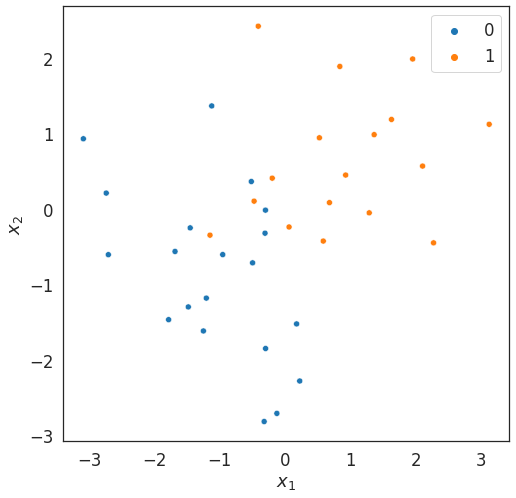

In [25]:
#Visualization

sns.set_style("white")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth": 2.5})

sns.scatterplot(data = X_train, x = X_train[:,-2], y = X_train[:,-1], hue = y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [32]:
#Logistic regresssion

log_reg = Logisticregression()
log_reg.gd(X_train, y_train, num_epochs = 1000, reg_rate = 0, lr = 1e-2)

array([0.78593936, 2.74492515, 1.61877709])

In [33]:
#Learning Curve

def plot_learning_curve(err):
  plt.plot(np.arange(len(err)), err, 'r-')
  plt.xlabel('Iter #')
  plt.ylabel('$\mathbf{J(w)}$')

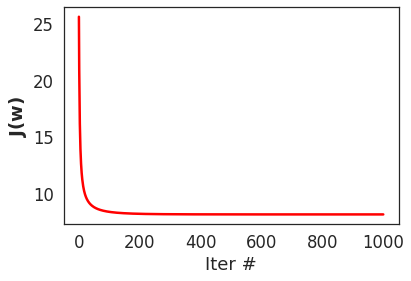

In [34]:
plot_learning_curve(log_reg.err_all)  #loss stored as a member variable

In [35]:
#weight vector

print("Weight vector: ", log_reg.w)

Weight vector:  [0.78593936 2.74492515 1.61877709]


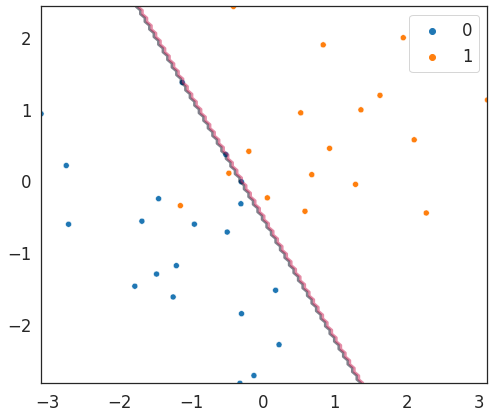

In [37]:
#Model visualization

sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})
def visualize_model(x_train,labels,lsc_obj,degree=1):
    f=plt.figure(figsize=(8,8))
    
    # compute xlim and ylim
    x1_min=np.min(x_train[:,1])
    x1_max=np.max(x_train[:,1])
    x2_min=np.min(x_train[:,2])
    x2_max=np.max(x_train[:,2])

    x1_test,x2_test=np.meshgrid(np.linspace(x1_min,x1_max,100),np.linspace(x2_min,x2_max,100))
    x_test=np.array([x1_test,x2_test]).reshape(2,-1).T
    x_test_poly=polynomial_transform(x_test,degree=degree)
    y_test=lsc_obj.predict(x_test_poly, threshold = 0.5)

    sns.scatterplot(data=x_train,x=x_train[:,1],y=x_train[:,2],hue=labels)
    plt.contour(x1_test,x2_test,y_test.reshape(100,100),alpha=0.5,levels=np.linspace(0,1,3))
    plt.xlim=(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    plt.gca().set_aspect('equal',adjustable='box')
    plt.show()

visualize_model(X_train,y_train,log_reg,degree=1)

In [39]:
#Model Evaluation

y_test_hat = log_reg.predict(X_text, threshold = 0.5)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hat, zero_division = 0))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.88      0.88      0.88         8

    accuracy                           0.85        13
   macro avg       0.84      0.84      0.84        13
weighted avg       0.85      0.85      0.85        13



## **Demo - 2 Polynomial least square classification**

In [43]:
#Demo - 2 Polynomial least square classification